# <font color=tomato>Federal Home Loan Bank Members
    
    - Deep Learning

- 0306_fhlb_ML.ipynb 에서 이어집니다(데이터에 대한 자세한 설명은 이 파일을 참고해 주세요)
- 이번에는 딥러닝을 해볼 것입니다

[데이터 출처](https://catalog.data.gov/dataset/federal-home-loan-bank-members)

## 1. 데이터 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_fhlb = pd.read_csv('C:/Users/chell/Downloads/fhlb_members.csv')

In [3]:
data_fhlb.head()

,fhfb_id,district,member_name,city,state,zip,mem_type,char_type,cert,fed_id,ots_id,ncua_id,appr_date
0,7,Atlanta,Piedmont FS and LA,Winston Salem,NC,27101,Savings and Loan,Federal,27619.0,NaN,7.0,NaN,NaN
1,16,Dallas,State-Investors Bank,Metairie,LA,70005,Savings and Loan,Federal,27626.0,NaN,16.0,NaN,NaN
2,41,Cincinnati,First Federal Bank of Ohio,Galion,OH,44833,Savings and Loan,Federal,27643.0,NaN,41.0,NaN,NaN
3,57,Dallas,Home Federal Bank,Shreveport,LA,71101,Savings and Loan,Federal,27654.0,NaN,57.0,NaN,NaN
4,73,Chicago,"Sterling Federal Bank, F.S.B.",Sterling,IL,61081,Savings and Loan,Federal,27664.0,NaN,73.0,NaN,NaN


In [4]:
data_fhlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7462 entries, 0 to 7461
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fhfb_id      7462 non-null   int64  
 1   district     7462 non-null   object 
 2   member_name  7462 non-null   object 
 3   city         7462 non-null   object 
 4   state        7462 non-null   object 
 5   zip          7462 non-null   int64  
 6   mem_type     7462 non-null   object 
 7   char_type    7462 non-null   object 
 8   cert         5921 non-null   float64
 9   fed_id       5372 non-null   float64
 10  ots_id       549 non-null    float64
 11  ncua_id      1233 non-null   float64
 12  appr_date    6649 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 758.0+ KB


In [5]:
data_fhlb.isna().sum()

fhfb_id           0
district          0
member_name       0
city              0
state             0
zip               0
mem_type          0
char_type         0
cert           1541
fed_id         2090
ots_id         6913
ncua_id        6229
appr_date       813
dtype: int64

In [6]:
data_fb = data_fhlb.copy()

- id들(fhfb_id, fed_id, ots_id, ncua_id)은 크게 의미가 있는 변수가 아니라고 판단해서 null값을 채우는 대신 삭제
- 같은 이유로 zip(우편번호), cert(인증번호)도 삭제
- member_name, city는 변수 종류가 너무 많아서 삭제(분석할 때 가변수화를 하면 지나치게 많아질 것이라서)
- appr_date에는 문자가 섞여있어 날짜를 나누는 데 어려움이 있어 삭제
    - 12apr2000 이런 식으로 되어있었음

In [7]:
col_d = ['fhfb_id', 'fed_id', 'ots_id', 'ncua_id', 'member_name', 'city', 'zip', 'cert', 'appr_date']
data_fb = data_fb.drop(col_d, axis=1)

In [8]:
data_fb.columns

Index(['district', 'state', 'mem_type', 'char_type'], dtype='object')

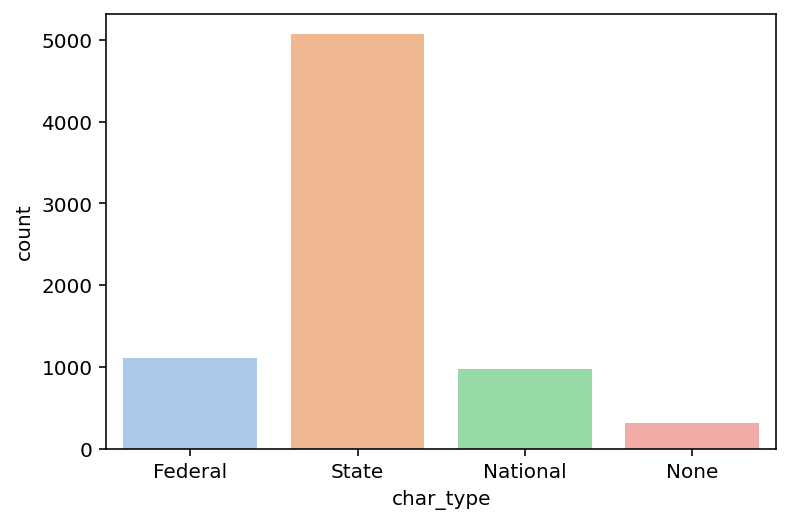

In [9]:
sns.countplot(data_fb['char_type'], palette='pastel')
plt.show()

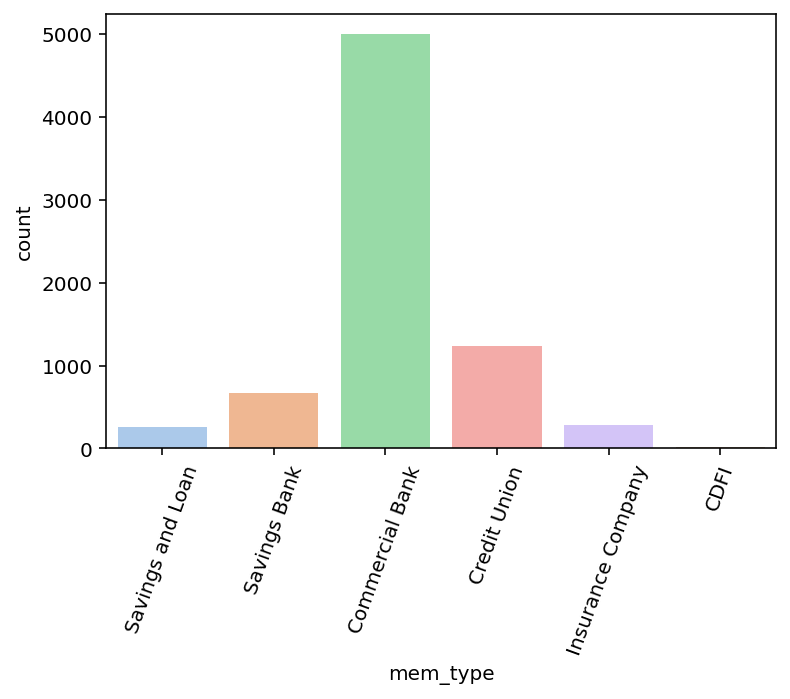

In [10]:
sns.countplot(data_fb['mem_type'], palette='pastel')
plt.xticks(rotation=70)
plt.show()

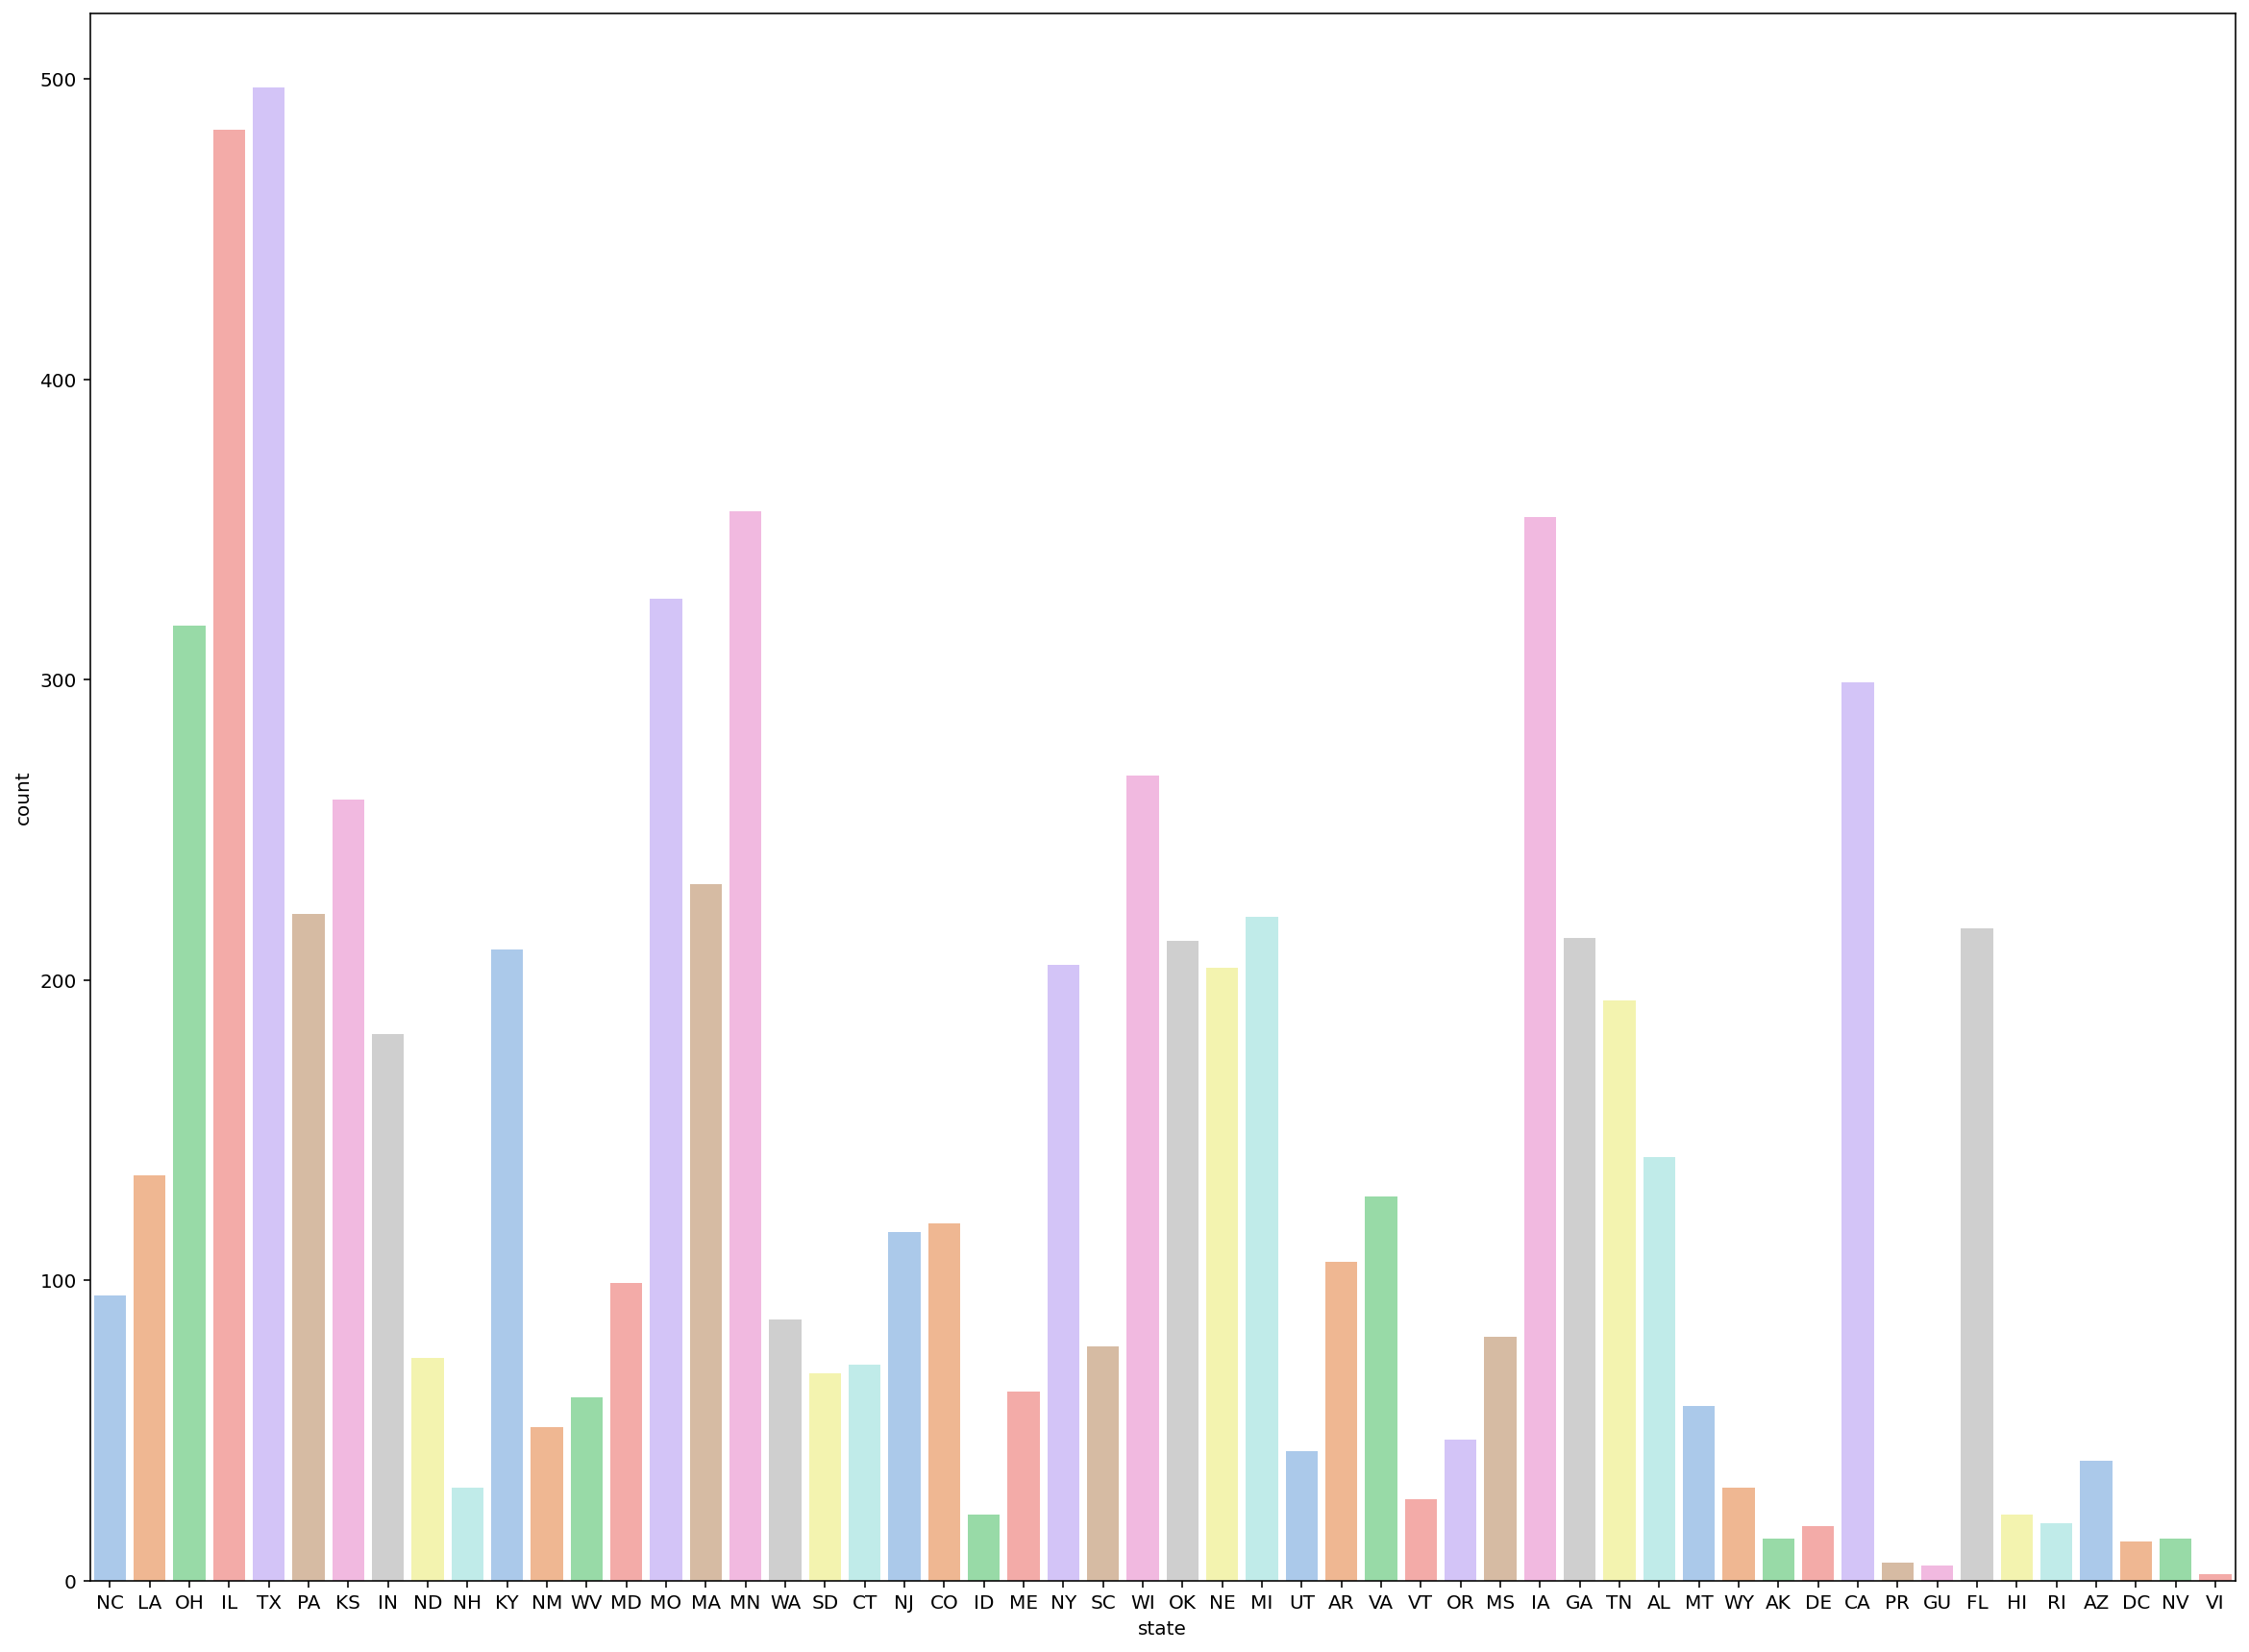

In [11]:
plt.figure(figsize=(20, 15))
sns.countplot(data_fb['state'], palette='pastel')
plt.show()

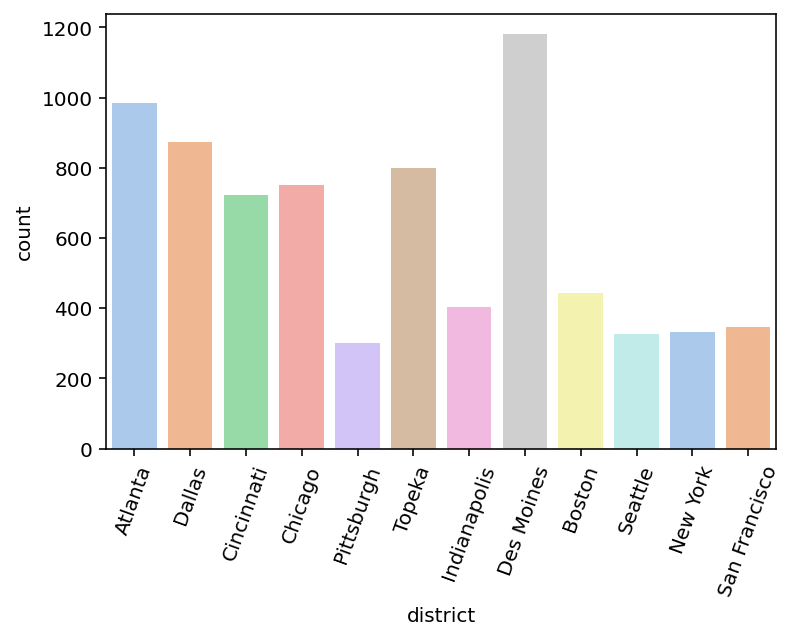

In [12]:
sns.countplot(data_fb['district'], palette='pastel')
plt.xticks(rotation=70)
plt.show()

## 2. 데이터 전처리

- target = char_type(가입 유형)

In [13]:
x = data_fb.drop('char_type', axis=1)
y = data_fb['char_type']

In [14]:
x.shape, y.shape

((7462, 3), (7462,))

In [15]:
dum_col = ['district', 'state', 'mem_type']
x = pd.get_dummies(x, columns=dum_col)

In [16]:
x.shape, y.shape

((7462, 72), (7462,))

In [17]:
# !pip install imblearn

In [18]:
# 오버샘플링
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2022)
x, y = smote.fit_resample(x, y)

- 데이터가 불균형하여 오버샘플링을 진행함

## 3. Deep Learning

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

### 1) sklearn - MLPClassifier

[MLP 신경망 튜닝](https://jhryu1208.github.io/data/2020/11/26/ML_Neural-Network-tunning/)


- 다층 퍼셉트론 분류기로, 이 모델은 LBFGS 또는 확률적 경사하강법을 사용하여 로그 손실 함수를 최적화합니다. [참고 - sklearn 공식 사이트](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)


[LBFGS 설명 - 위키백과](https://ko.wikipedia.org/wiki/L-BFGS)

In [21]:
from sklearn.neural_network import MLPClassifier

In [22]:
mlp = MLPClassifier(hidden_layer_sizes=(128,),
                    activation='relu',
                    alpha=0.01,
                    batch_size=32,
                    max_iter=300)

In [23]:
mlp.fit(x_train, y_train)

MLPClassifier(alpha=0.01, batch_size=32, hidden_layer_sizes=(128,),
              max_iter=300)

In [24]:
# 정확도
mlp.score(x_test, y_test)

0.7960039467192896

### * y에 대한 전처리

In [25]:
import tensorflow as tf

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [29]:
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [30]:
y_train[:5]

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

### 2) Functional API 

In [31]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.activations import relu, softmax

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

In [32]:
x_train.shape, y_train.shape

((16214, 72), (16214, 4))

- 오버샘플링을 하여 데이터가 증가함

In [33]:
## Functional API

# 1. 세션 클리어
clear_session

# 2. 레이어 엮기
il = Input(shape=(72,), name='input')
hl = Dense(128, activation=relu, name='h1')(il)
hl = Dense(128, activation=relu, name='h2')(hl)
hl = Dense(128, activation=relu, name='h3')(hl)
hl = Dense(128, activation=relu, name='h4')(hl)
ol = Dense(4, activation=softmax, name='output')(hl)

# 3. 모델 시작, 끝 지정
model = Model(il, ol)

# 4. 컴파일
model.compile(loss=categorical_crossentropy, metrics='accuracy', optimizer=Adam(0.01))

In [34]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 72)]              0         
                                                                 
 h1 (Dense)                  (None, 128)               9344      
                                                                 
 h2 (Dense)                  (None, 128)               16512     
                                                                 
 h3 (Dense)                  (None, 128)               16512     
                                                                 
 h4 (Dense)                  (None, 128)               16512     
                                                                 
 output (Dense)              (None, 4)                 516       
                                                                 
Total params: 59,396
Trainable params: 59,396
Non-trainable p

In [35]:
# conda install pydot

In [36]:
# conda install graphviz

In [37]:
# pip list

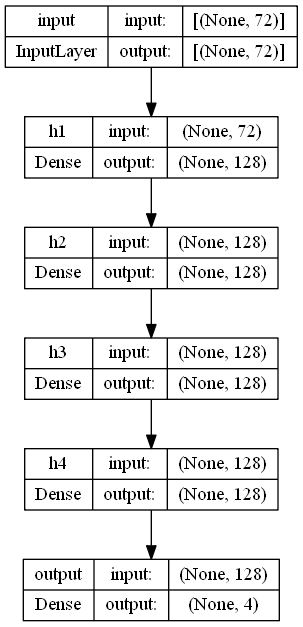

In [38]:
plot_model(model, show_shapes=True)

In [39]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=3,
                   verbose=1,
                   restore_best_weights=True)

In [40]:
mc = ModelCheckpoint('good.h5',
                     monitor='val_loss',
                     verbose=1,
                     save_best_only=True)

In [42]:
model.fit(x_train, y_train, epochs=25, validation_split=0.2, verbose=1,
          callbacks=[es, mc])

Epoch 1/25
376/406 [==========================>...] - ETA: 0s - loss: 0.6448 - accuracy: 0.7296
Epoch 1: val_loss improved from inf to 0.46519, saving model to good.h5
406/406 [==============================] - 2s 3ms/step - loss: 0.6345 - accuracy: 0.7313 - val_loss: 0.4652 - val_accuracy: 0.7613
Epoch 2/25
382/406 [===========================>..] - ETA: 0s - loss: 0.4808 - accuracy: 0.7619
Epoch 2: val_loss did not improve from 0.46519
406/406 [==============================] - 1s 2ms/step - loss: 0.4793 - accuracy: 0.7612 - val_loss: 0.5050 - val_accuracy: 0.7536
Epoch 3/25
406/406 [==============================] - ETA: 0s - loss: 0.4780 - accuracy: 0.7634
Epoch 3: val_loss did not improve from 0.46519
406/406 [==============================] - 1s 3ms/step - loss: 0.4780 - accuracy: 0.7634 - val_loss: 0.4750 - val_accuracy: 0.7635
Epoch 4/25
400/406 [============================>.] - ETA: 0s - loss: 0.4511 - accuracy: 0.7700
Epoch 4: val_loss improved from 0.46519 to 0.45373, savin